In [52]:
%matplotlib inline 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_validation import cross_val_score, ShuffleSplit, train_test_split
from sklearn.datasets import load_boston
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import svm
from sklearn import linear_model
import pandas as pd
import numpy as np

%matplotlib inline
#import seaborn as sns
#sns.set_style("white")
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Step 1(a): Importing Dataset
This is IMDB movie dataset which is downloaded from Kaggle. 

A bit about the dataset:
- 28 variables for 5043 movies 

- Below are the 28 variables:
- "movie_title" "color" "num_critic_for_reviews" "movie_facebook_likes" "duration" "director_name" "director_facebook_likes" "actor_3_name" "actor_3_facebook_likes" "actor_2_name" "actor_2_facebook_likes" "actor_1_name" "actor_1_facebook_likes" "gross" "genres" "num_voted_users" "cast_total_facebook_likes" "facenumber_in_poster" "plot_keywords" "movie_imdb_link" "num_user_for_reviews" "language" "country" "content_rating" "budget" "title_year" "imdb_score" "aspect_ratio"

In [53]:
import pandas as pd
datasource = pd.read_csv('file://localhost/C:/Users/jashm/Desktop/718P/movie_metadata.csv', delimiter=',')

datasource = datasource.dropna(how='any')  #Removing all the rows with Null/NaN values. 
#This step is done because NaN values in features will give an error when we try to fit linear regression model.

In [54]:
datasource.head()


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000


In [55]:
datasource.shape[0] #Actual Dataset from Kaggle had 5043 rows, after removing the NaN values there are 3756 rows in the dataframe.

3756

In [56]:
datasource.shape[1] # 28 columns in the dataframe

28

After looking at the dataset, we have decided to predict *imdb_score* (Label/Target).
Also, we need to consider only those features which have numerical values in them because features  which have text value (for e.g. "director_name", "actor_2_name" etc ) in them will not fit into the models.

# Step 1(b): Feature & Label Preparation

From the "datasource" Dataframe, we are only fetching features/columns which contain Numerical values, we are storing this into a dataframe called as "Features". 

Secondly, we are storing our label "imdb_score" into the dataframe called "Label".

In [57]:
Features=datasource[[2,3,4,5,7,8,12,13,18,22,24,26,27]] 

In [58]:
type(Features)

pandas.core.frame.DataFrame

In [59]:
Features.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,3054.0,237000000.0,936.0,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,1238.0,300000000.0,5000.0,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,994.0,245000000.0,393.0,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,2701.0,250000000.0,23000.0,2.35,164000
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,738.0,263700000.0,632.0,2.35,24000


In [60]:
Label=datasource[[25]]

In [61]:
LabelMatrix = Label.as_matrix()
FeaturesMatrix = Features.as_matrix()

# Step 1(c): Renaming
- Features --> IMDB_Features_df
- Label --> IMDB_Label_df
- IMDB_Features_df + IMDB_Label_df --> IMDB_df

In [62]:
IMDB_Features_df = pd.DataFrame(Features, columns= ["num_critic_for_reviews","duration","director_facebook_likes",
                                                    "actor_3_facebook_likes","actor_1_facebook_likes","gross","num_voted_users",
                                                    "cast_total_facebook_likes","num_user_for_reviews","budget",
                                                     "actor_2_facebook_likes","aspect_ratio","movie_facebook_likes"])



In [63]:
IMDB_Label_df = pd.DataFrame(Label, columns= ["imdb_score"])

In [64]:
#IMDB_Label_df.head()

In [65]:
IMDB_df = IMDB_Features_df

In [66]:
IMDB_df = pd.concat((IMDB_Features_df, IMDB_Label_df), axis=1)

In [67]:
#IMDB_df.head()

In [68]:
print ("Number of observations: {}\nNumber of features {}".\
    format(IMDB_df.shape[0], IMDB_df.shape[1]))

Number of observations: 3756
Number of features 14


In [69]:
IMDB_df.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,imdb_score
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,3054.0,237000000.0,936.0,1.78,33000,7.9
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,1238.0,300000000.0,5000.0,2.35,0,7.1
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,994.0,245000000.0,393.0,2.35,85000,6.8
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,2701.0,250000000.0,23000.0,2.35,164000,8.5
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,738.0,263700000.0,632.0,2.35,24000,6.6


# Finding out the Accuracy of Linear Regression for all features

In [70]:
# baseline - what's the score of all the features? Answer: Not very good. we can do better.
scores = cross_val_score(linear_model.LinearRegression(), IMDB_Features_df, IMDB_Label_df, scoring='r2') # mean_squared_error
print("Linear Regression Accuracy all Features: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

#We are going to further select best features and then try to find out the accuracy again

Linear Regression Accuracy all Features: 0.19 (+/- 0.27)


# Step 2: Select Best Features 

We are going to use three methods to select the best features for predicting "imdb_score"

The three methods for getting scores for features are: Pearson, SelectKBest and RandomForestRegressor

# Step 2(a) : Pearson
Finding out features which are correlated with the label

In [71]:
IMDB_df.corr(method='pearson') # We are getting similar results for - pearson, kendall, spearman
# Top 3 Features:
#num_voted_users
#duration
#num_critic_for_reviews

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,imdb_score
num_critic_for_reviews,1.000000,0.228631,0.175128,0.252782,0.165986,0.464187,0.592473,0.236533,0.563684,0.104717,0.253125,0.180230,0.705226,0.347886
duration,0.228631,1.000000,0.180644,0.125797,0.083632,0.245726,0.339592,0.120179,0.351595,0.068012,0.128935,0.153027,0.215303,0.366221
director_facebook_likes,0.175128,0.180644,1.000000,0.117405,0.089630,0.138351,0.299624,0.118547,0.217103,0.018167,0.116058,0.037528,0.161962,0.192314
actor_3_facebook_likes,0.252782,0.125797,0.117405,1.000000,0.252408,0.299864,0.267762,0.489795,0.205343,0.039966,0.553755,0.046356,0.271508,0.065544
actor_1_facebook_likes,0.165986,0.083632,0.089630,0.252408,1.000000,0.144010,0.179590,0.944813,0.121935,0.016418,0.391166,0.056946,0.130300,0.093597
gross,0.464187,0.245726,0.138351,0.299864,0.144010,1.000000,0.624949,0.235601,0.544674,0.099496,0.252842,0.063946,0.366933,0.214740
num_voted_users,0.592473,0.339592,0.299624,0.267762,0.179590,0.624949,1.000000,0.249119,0.778881,0.065927,0.244822,0.084626,0.517751,0.482430
cast_total_facebook_likes,0.236533,0.120179,0.118547,0.489795,0.944813,0.235601,0.249119,1.000000,0.178675,0.028682,0.642991,0.068952,0.205564,0.106803
num_user_for_reviews,0.563684,0.351595,0.217103,0.205343,0.121935,0.544674,0.778881,0.178675,1.000000,0.070372,0.187016,0.098109,0.370465,0.325003
budget,0.104717,0.068012,0.018167,0.039966,0.016418,0.099496,0.065927,0.028682,0.070372,1.000000,0.035715,0.025264,0.052490,0.029190


# Step 2(b) : SelectKBest

In [21]:
# Return the 2 features with highest variance 
IMDB_best2 = SelectKBest(f_regression, k=2).fit_transform(IMDB_Features_df, IMDB_Label_df) 

In [22]:
IMDB_best2 
#Top 2 features 
# duration
# num_voted_users

array([[  1.78000000e+02,   8.86204000e+05],
       [  1.69000000e+02,   4.71220000e+05],
       [  1.48000000e+02,   2.75868000e+05],
       ..., 
       [  7.70000000e+01,   7.26390000e+04],
       [  8.10000000e+01,   5.20550000e+04],
       [  9.00000000e+01,   4.28500000e+03]])

# Step 2(c) : Random Forest Regressor

In [26]:
names1=["num_critic_for_reviews","duration","director_facebook_likes","actor_3_facebook_likes","actor_1_facebook_likes","gross","num_voted_users",
              "cast_total_facebook_likes","num_user_for_reviews","budget","actor_2_facebook_likes",
          "aspect_ratio","movie_facebook_likes"]

In [27]:
# univariate feature selection using Random Forest Regressor
# this is a different approach, but confirms our best two features
rf = RandomForestRegressor(n_estimators=20, max_depth=4)
scores1 = []
for i in range(FeaturesMatrix.shape[1]):
     score = cross_val_score(rf, FeaturesMatrix[:, i:i+1], LabelMatrix, scoring="r2",  #'mean_squared_error' sklearn impl is negative.
                              cv=ShuffleSplit(n=len(FeaturesMatrix), n_iter=10, test_size=.1))
     scores1.append((round(np.mean(score), 10), names1[i]))
scores1_df = pd.DataFrame(scores1, columns = ['score', 'feature'])
scores1_df.sort_values(['score'], ascending=False)

,score,feature
6,0.260176,num_voted_users
12,0.173516,movie_facebook_likes
1,0.166633,duration
0,0.131083,num_critic_for_reviews
8,0.128111,num_user_for_reviews
2,0.119189,director_facebook_likes
4,0.054754,actor_1_facebook_likes
5,0.050381,gross
7,0.050083,cast_total_facebook_likes
10,0.029234,actor_2_facebook_likes



1) As we notice that after the top six features, the scores is drastically decreasing. 

2) (a) We see some common features from the previous methods: *num_voted_users* and *duration*.

2) (b) We are going to use *num_voted_users* to fit the model, 

2) (c) then we will use *num_voted_users* and *duration*, 

2) (d) finally we will use the top 6 features from Random Forest Regressor: *num_voted_users, movie_facebook_likes, duration, director_facebook_likes, num_user_for_reviews, num_critic_for_reviews*

# Step 3 : Splitting the dataset into Train, Test, Validation Dataset

Initial Split: Train:80% , Test: 10% , Vaidation: 10%

In [236]:
from sklearn.cross_validation import train_test_split

In [237]:
X_train_validation, X_test, y_train_validation, y_test = train_test_split(IMDB_Features_df, 
                                                                          IMDB_Label_df, 
                                                                          test_size = 0.1, 
                                                                          random_state = 0)

In [238]:
X_train, X_validation, y_train, y_validation = train_test_split(X_train_validation, 
                                                                y_train_validation, 
                                                                test_size = 0.1, 
                                                                random_state = 0)


In [239]:
len(X_train),len(X_test), len(X_validation)

(3042, 376, 338)

Train:70% , Test: 20% , Vaidation: 10%

In [240]:
X_train_validation1, X_test1, y_train_validation1, y_test1 = train_test_split(IMDB_Features_df, 
                                                                          IMDB_Label_df, 
                                                                          test_size = 0.2, 
                                                                          random_state = 0)


In [241]:

X_train1, X_validation1, y_train1, y_validation1 = train_test_split(X_train_validation1, 
                                                                y_train_validation1, 
                                                                test_size = 0.1, 
                                                                random_state = 0)

In [242]:
len(X_train1),len(X_test1), len(X_validation1)

(2703, 752, 301)

Train:50% , Test: 40% 

In [243]:
X_train_validation2, X_test2, y_train_validation2, y_test2 = train_test_split(IMDB_Features_df, 
                                                                          IMDB_Label_df, 
                                                                          test_size = 0.4, 
                                                                          random_state = 0)

In [244]:

X_train2, X_validation2, y_train2, y_validation2 = train_test_split(X_train_validation2, 
                                                                y_train_validation2, 
                                                                test_size = 0.15, 
                                                                random_state = 0)

In [245]:
len(X_train2),len(X_test2), len(X_validation2)

(1915, 1503, 338)

Train : 30 % , Test : 60%

In [246]:
X_train_validation3, X_test3, y_train_validation3, y_test3 = train_test_split(IMDB_Features_df, 
                                                                          IMDB_Label_df, 
                                                                          test_size = 0.6, 
                                                                          random_state = 0)

In [247]:

X_train3, X_validation3, y_train3, y_validation3 = train_test_split(X_train_validation3, 
                                                                y_train_validation3, 
                                                                test_size = 0.2, 
                                                                random_state = 0)

In [248]:
len(X_train3),len(X_test3), len(X_validation3)

(1201, 2254, 301)

Train : 15 %,  Test : 80%

In [249]:
X_train_validation4, X_test4, y_train_validation4, y_test4 = train_test_split(IMDB_Features_df, 
                                                                          IMDB_Label_df, 
                                                                          test_size = 0.8, 
                                                                          random_state = 0)

In [250]:

X_train4, X_validation4, y_train4, y_validation4 = train_test_split(X_train_validation4, 
                                                                y_train_validation4, 
                                                                test_size = 0.2, 
                                                                random_state = 0)

In [251]:
len(X_train4),len(X_test4), len(X_validation4)

(600, 3005, 151)

# Feature Set 1 (FS1)

num_voted_users
RF(1), SelectKBest(2), Pearson(1)

# Feature Set 2 (FS2)



num_voted_users, duration
num_voted_users: RF(1), SelectKBest(2), Pearson(1) duration: RF(3), SelectKBest(1), Pearson(2)

# Feature Set 3 (FS3) 

Considering top 6 features from RF: num_voted_users, movie_facebook_likes, duration, director_facebook_likes, num_user_for_reviews, num_critic_for_reviews

In [252]:
FS1 = pd.DataFrame(IMDB_Features_df["num_voted_users"])

In [253]:
columns= ['num_voted_users','duration']
FS2 = pd.DataFrame(IMDB_Features_df, columns=columns)

#columns= ['num_voted_users','movie_facebook_likes','duration','num_critic_for_reviews','num_user_for_reviews','director_facebook_likes']


In [254]:
columns= ["num_voted_users", "movie_facebook_likes", "duration", "director_facebook_likes", "num_user_for_reviews", "num_critic_for_reviews"]
FS3 = pd.DataFrame(IMDB_Features_df, columns=columns)

In [255]:
# Let's assess the accuracy of some other models.
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
nn3_model = KNeighborsRegressor(n_neighbors=3)
nn5_model = KNeighborsRegressor(n_neighbors=5)
nn7_model = KNeighborsRegressor(n_neighbors=7)
nn9_model = KNeighborsRegressor(n_neighbors=9)
regr = linear_model.LinearRegression()
decision_tree = tree.DecisionTreeRegressor()
poly2 = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])
poly3 = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])
poly4 = Pipeline([('poly', PolynomialFeatures(degree=4)),('linear', LinearRegression(fit_intercept=False))])
poly5 = Pipeline([('poly', PolynomialFeatures(degree=5)),('linear', LinearRegression(fit_intercept=False))])
rf = RandomForestRegressor()
models = [ {'name' : '3-Nearest Neighbors', 'estimator' : nn3_model},
          {'name' : '5-Nearest Neighbors', 'estimator' : nn5_model},
          {'name' : '7-Nearest Neighbors', 'estimator' : nn7_model},
          {'name' : '9-Nearest Neighbors', 'estimator' : nn9_model},
          {'name' : 'Linear Regression', 'estimator' : regr},
          {'name' : 'Decision Tree', 'estimator' : decision_tree},
          {'name' : 'Random Forest', 'estimator' : rf}
         ]
for model in models:
    scores = cross_val_score(model['estimator'], FS3, IMDB_Label_df, cv=ShuffleSplit(n=len(FS3), n_iter=10, test_size=.1), scoring='r2' )
    print(" %s Accuracy: %0.2f (+/- %0.2f)" % (model['name'], scores.mean(), scores.std() * 2))

 3-Nearest Neighbors Accuracy: 0.08 (+/- 0.14)
 5-Nearest Neighbors Accuracy: 0.14 (+/- 0.08)
 7-Nearest Neighbors Accuracy: 0.16 (+/- 0.11)
 9-Nearest Neighbors Accuracy: 0.21 (+/- 0.06)
 Linear Regression Accuracy: 0.30 (+/- 0.05)
 Decision Tree Accuracy: -0.14 (+/- 0.22)
 Random Forest Accuracy: 0.35 (+/- 0.08)


# Linear Regression Train Test Error

In [256]:
from sklearn.linear_model import LinearRegression

In [257]:
model1 = LinearRegression().fit(X_train[['num_voted_users']], y_train)
model2 = LinearRegression().fit(X_train[['num_voted_users', 'duration']], y_train)
model3 = LinearRegression().fit(X_train[['num_voted_users','movie_facebook_likes','duration','num_critic_for_reviews','num_user_for_reviews','director_facebook_likes']], y_train)



model4 = LinearRegression().fit(X_train1[['num_voted_users']], y_train1)
model5 = LinearRegression().fit(X_train1[['num_voted_users', 'duration']], y_train1)
model6 = LinearRegression().fit(X_train1[['num_voted_users','movie_facebook_likes','duration','num_critic_for_reviews','num_user_for_reviews','director_facebook_likes']], y_train1)



model7 = LinearRegression().fit(X_train2[['num_voted_users']], y_train2)
model8 = LinearRegression().fit(X_train2[['num_voted_users', 'duration']], y_train2)
model9 = LinearRegression().fit(X_train2[['num_voted_users','movie_facebook_likes','duration','num_critic_for_reviews','num_user_for_reviews','director_facebook_likes']], y_train2)


model10 = LinearRegression().fit(X_train3[['num_voted_users']], y_train3)
model11 = LinearRegression().fit(X_train3[['num_voted_users', 'duration']], y_train3)
model12 = LinearRegression().fit(X_train3[['num_voted_users','movie_facebook_likes','duration','num_critic_for_reviews','num_user_for_reviews','director_facebook_likes']], y_train3)

model13 = LinearRegression().fit(X_train4[['num_voted_users']], y_train4)
model14 = LinearRegression().fit(X_train4[['num_voted_users', 'duration']], y_train4)
model15 = LinearRegression().fit(X_train4[['num_voted_users','movie_facebook_likes','duration','num_critic_for_reviews','num_user_for_reviews','director_facebook_likes']], y_train4)


In [258]:
# Let's compute the training MSE
model1_train_err = ((model1.predict(X_train[['num_voted_users']]) - y_train)**2).mean()[0]
model2_train_err = ((model2.predict(X_train[['num_voted_users', 'duration']]) - y_train)**2).mean()[0]
model3_train_err = ((model3.predict(X_train[['num_voted_users','movie_facebook_likes','duration','num_critic_for_reviews','num_user_for_reviews','director_facebook_likes']]) - y_train)**2).mean()[0]

model4_train_err = ((model4.predict(X_train1[['num_voted_users']]) - y_train1)**2).mean()[0]
model5_train_err = ((model5.predict(X_train1[['num_voted_users', 'duration']]) - y_train1)**2).mean()[0]
model6_train_err = ((model6.predict(X_train1[['num_voted_users','movie_facebook_likes','duration','num_critic_for_reviews','num_user_for_reviews','director_facebook_likes']]) - y_train1)**2).mean()[0]

model7_train_err = ((model7.predict(X_train2[['num_voted_users']]) - y_train2)**2).mean()[0]
model8_train_err = ((model8.predict(X_train2[['num_voted_users', 'duration']]) - y_train2)**2).mean()[0]
model9_train_err = ((model9.predict(X_train2[['num_voted_users','movie_facebook_likes','duration','num_critic_for_reviews','num_user_for_reviews','director_facebook_likes']]) - y_train2)**2).mean()[0]

model10_train_err = ((model10.predict(X_train3[['num_voted_users']]) - y_train3)**2).mean()[0]
model11_train_err = ((model11.predict(X_train3[['num_voted_users', 'duration']]) - y_train3)**2).mean()[0]
model12_train_err = ((model12.predict(X_train3[['num_voted_users','movie_facebook_likes','duration','num_critic_for_reviews','num_user_for_reviews','director_facebook_likes']]) - y_train3)**2).mean()[0]


model13_train_err = ((model10.predict(X_train4[['num_voted_users']]) - y_train4)**2).mean()[0]
model14_train_err = ((model11.predict(X_train4[['num_voted_users', 'duration']]) - y_train4)**2).mean()[0]
model15_train_err = ((model12.predict(X_train4[['num_voted_users','movie_facebook_likes','duration','num_critic_for_reviews','num_user_for_reviews','director_facebook_likes']]) - y_train4)**2).mean()[0]


In [259]:
[model1_train_err, model2_train_err, model3_train_err] #80%

[0.84010486354326097, 0.78268345514416027, 0.75290426284622536]

In [260]:
[model4_train_err, model5_train_err, model6_train_err] #70%

[0.83854585072727283, 0.78125750120761228, 0.75470490096611176]

In [261]:
[model10_train_err, model11_train_err, model12_train_err] 

[0.82933012856505495, 0.7648109598952848, 0.73193912113415527]

In [262]:
[model13_train_err, model14_train_err, model15_train_err] #50%

[0.76695925960914679, 0.70045443896099813, 0.66896956300956212]

In [263]:
model1_validation_err = ((model1.predict(X_validation[['num_voted_users']]) - y_validation)**2).mean()[0]
model2_validation_err = ((model2.predict(X_validation[['num_voted_users', 'duration']]) - y_validation)**2).mean()[0]
model3_validation_err = ((model3.predict(X_validation[['num_voted_users','movie_facebook_likes','duration','num_critic_for_reviews','num_user_for_reviews','director_facebook_likes']]) - y_validation)**2).mean()[0]


In [264]:
[model1_validation_err, model2_validation_err, model3_validation_err]

[0.97916695577219526, 0.92326782297190735, 0.89889737521284074]

In [265]:
model1_test_err = ((model1.predict(X_test[['num_voted_users']]) - y_test)**2).mean()[0]
model2_test_err = ((model2.predict(X_test[['num_voted_users','duration']]) - y_test)**2).mean()[0]
model3_test_err = ((model3.predict(X_test[['num_voted_users','movie_facebook_likes','duration','num_critic_for_reviews','num_user_for_reviews','director_facebook_likes']]) - y_test)**2).mean()[0]


model4_test_err = ((model4.predict(X_test1[['num_voted_users']]) - y_test1)**2).mean()[0]
model5_test_err = ((model5.predict(X_test1[['num_voted_users','duration']]) - y_test1)**2).mean()[0]
model6_test_err = ((model6.predict(X_test1[['num_voted_users','movie_facebook_likes','duration','num_critic_for_reviews','num_user_for_reviews','director_facebook_likes']]) - y_test1)**2).mean()[0]

model7_test_err = ((model7.predict(X_test2[['num_voted_users']]) - y_test2)**2).mean()[0]
model8_test_err = ((model8.predict(X_test2[['num_voted_users','duration']]) - y_test2)**2).mean()[0]
model9_test_err = ((model9.predict(X_test2[['num_voted_users','movie_facebook_likes','duration','num_critic_for_reviews','num_user_for_reviews','director_facebook_likes']]) - y_test2)**2).mean()[0]

model10_test_err = ((model10.predict(X_test3[['num_voted_users']]) - y_test3)**2).mean()[0]
model11_test_err = ((model11.predict(X_test3[['num_voted_users','duration']]) - y_test3)**2).mean()[0]
model12_test_err = ((model12.predict(X_test3[['num_voted_users','movie_facebook_likes','duration','num_critic_for_reviews','num_user_for_reviews','director_facebook_likes']]) - y_test3)**2).mean()[0]

model13_test_err = ((model13.predict(X_test4[['num_voted_users']]) - y_test4)**2).mean()[0]
model14_test_err = ((model14.predict(X_test4[['num_voted_users','duration']]) - y_test4)**2).mean()[0]
model15_test_err = ((model15.predict(X_test4[['num_voted_users','movie_facebook_likes','duration','num_critic_for_reviews','num_user_for_reviews','director_facebook_likes']]) - y_test4)**2).mean()[0]

In [266]:
[model7_train_err, model8_train_err, model9_train_err] #50%

[0.84761183631620551, 0.77719046892989763, 0.74931677805763464]

In [267]:
[model1_test_err,model2_test_err, model3_test_err]

[0.87175392644886796, 0.87251286753685231, 0.85924613322242194]

In [268]:
[model4_test_err,model5_test_err, model6_test_err]

[0.91136563512769697, 0.88919255538156794, 0.85876242842380779]

In [269]:
[model7_test_err,model8_test_err, model9_test_err]

[0.8817155234796652, 0.85638686715211743, 0.82716865657879013]

In [270]:
[model10_test_err,model11_test_err, model12_test_err]

[0.87302708517863969, 0.83165067451792196, 0.80886987511295727]

In [271]:
[model13_test_err,model14_test_err, model15_test_err]

[0.86962649128219627, 0.8239391120877736, 0.79936002846900767]

In [272]:
model12_test_err - model12_train_err

0.076930753978802002

In [273]:
model9_test_err - model9_train_err

0.077851878521155493

# Finding Training-Testing Converging Point 

In [274]:
performance_train = [model3_train_err,model6_train_err, model9_train_err, model12_train_err,model15_train_err]

In [275]:
performance_test = [ model3_test_err,  model6_test_err, model9_test_err, model12_test_err, model15_test_err]

In [276]:
l_set = [80,70,50,30,15]

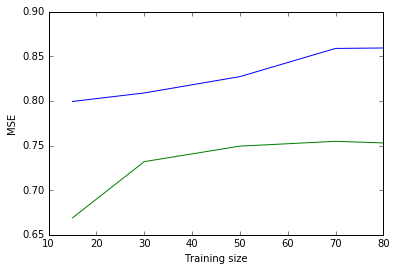

In [277]:
plt.plot(l_set,performance_test, 'b', label='train (Test)')
plt.plot(l_set,performance_train, 'g', label='train (Train)')

#plt.legend();
plt.xlabel('Training size');
plt.ylabel('MSE');


# Random Forest Regressor Train Test Error


In [278]:
model_rf1 = RandomForestRegressor().fit(X_train[["num_voted_users"]],y_train)
model_rf2 = RandomForestRegressor().fit(X_train[["num_voted_users","duration"]],y_train)
model_rf3 = RandomForestRegressor().fit(X_train[["num_voted_users","movie_facebook_likes","duration","num_critic_for_reviews","num_user_for_reviews","director_facebook_likes"]],y_train)


model_rf4 = RandomForestRegressor().fit(X_train1[["num_voted_users"]],y_train1)
model_rf5 = RandomForestRegressor().fit(X_train1[["num_voted_users","duration"]],y_train1)
model_rf6 = RandomForestRegressor().fit(X_train1[["num_voted_users","movie_facebook_likes","duration","num_critic_for_reviews","num_user_for_reviews","director_facebook_likes"]],y_train1)

model_rf7 = RandomForestRegressor().fit(X_train2[["num_voted_users"]],y_train2)
model_rf8 = RandomForestRegressor().fit(X_train2[["num_voted_users","duration"]],y_train2)
model_rf9 = RandomForestRegressor().fit(X_train2[["num_voted_users","movie_facebook_likes","duration","num_critic_for_reviews","num_user_for_reviews","director_facebook_likes"]],y_train2)

model_rf10 = RandomForestRegressor().fit(X_train3[["num_voted_users"]],y_train3)
model_rf11 = RandomForestRegressor().fit(X_train3[["num_voted_users","duration"]],y_train3)
model_rf12 = RandomForestRegressor().fit(X_train3[["num_voted_users","movie_facebook_likes","duration","num_critic_for_reviews","num_user_for_reviews","director_facebook_likes"]],y_train3)

model_rf13 = RandomForestRegressor().fit(X_train4[["num_voted_users"]],y_train4)
model_rf14 = RandomForestRegressor().fit(X_train4[["num_voted_users","duration"]],y_train4)
model_rf15 = RandomForestRegressor().fit(X_train4[["num_voted_users","movie_facebook_likes","duration","num_critic_for_reviews","num_user_for_reviews","director_facebook_likes"]],y_train4)





In [279]:
temp1 = model_rf1.predict(X_train[["num_voted_users"]])
temp2 = model_rf2.predict(X_train[["num_voted_users","duration"]])
temp3 = model_rf3.predict(X_train[["num_voted_users","movie_facebook_likes","duration","num_critic_for_reviews","num_user_for_reviews","director_facebook_likes"]])

temp4 = model_rf4.predict(X_train[["num_voted_users"]])
temp5 = model_rf5.predict(X_train[["num_voted_users","duration"]])
temp6 = model_rf6.predict(X_train[["num_voted_users","movie_facebook_likes","duration","num_critic_for_reviews","num_user_for_reviews","director_facebook_likes"]])

temp7 = model_rf7.predict(X_train[["num_voted_users"]])
temp8 = model_rf8.predict(X_train[["num_voted_users","duration"]])
temp9 = model_rf9.predict(X_train[["num_voted_users","movie_facebook_likes","duration","num_critic_for_reviews","num_user_for_reviews","director_facebook_likes"]])

temp10 = model_rf10.predict(X_train[["num_voted_users"]])
temp11 = model_rf11.predict(X_train[["num_voted_users","duration"]])
temp12 = model_rf12.predict(X_train[["num_voted_users","movie_facebook_likes","duration","num_critic_for_reviews","num_user_for_reviews","director_facebook_likes"]])

temp13 = model_rf13.predict(X_train[["num_voted_users"]])
temp14 = model_rf14.predict(X_train[["num_voted_users","duration"]])
temp15 = model_rf15.predict(X_train[["num_voted_users","movie_facebook_likes","duration","num_critic_for_reviews","num_user_for_reviews","director_facebook_likes"]])




In [280]:
numpyMatrix = y_train.as_matrix()

numpyMatrix1 = y_train1.as_matrix()

numpyMatrix2 = y_train2.as_matrix()

numpyMatrix3 = y_train3.as_matrix()

numpyMatrix4 = y_train4.as_matrix()


In [281]:

model_rf1_train_err = ((temp1 - numpyMatrix)**2).mean()
model_rf2_train_err = ((temp2 - numpyMatrix)**2).mean()
model_rf3_train_err = ((temp3 - numpyMatrix)**2).mean()

model_rf4_train_err = ((temp4 - numpyMatrix1)**2).mean()
model_rf5_train_err = ((temp5 - numpyMatrix1)**2).mean()
model_rf6_train_err = ((temp6 - numpyMatrix1)**2).mean()

model_rf7_train_err = ((temp7 - numpyMatrix2)**2).mean()
model_rf8_train_err = ((temp8 - numpyMatrix2)**2).mean()
model_rf9_train_err = ((temp9 - numpyMatrix2)**2).mean()

model_rf10_train_err = ((temp10 - numpyMatrix3)**2).mean()
model_rf11_train_err = ((temp11 - numpyMatrix3)**2).mean()
model_rf12_train_err = ((temp12 - numpyMatrix3)**2).mean()

model_rf13_train_err = ((temp13 - numpyMatrix4)**2).mean()
model_rf14_train_err = ((temp14 - numpyMatrix4)**2).mean()
model_rf15_train_err = ((temp15 - numpyMatrix4)**2).mean()

In [282]:
[model_rf1_train_err, model_rf2_train_err, model_rf3_train_err]

[1.807675694289087, 1.8302118728119714, 1.8518209154458656]

In [283]:
[model_rf4_train_err, model_rf5_train_err, model_rf6_train_err]

[1.7983839925619172, 1.7992887156209643, 1.7888405911395129]

In [284]:
[model_rf7_train_err, model_rf8_train_err, model_rf9_train_err]

[1.8636007293916246, 1.8327139536480561, 1.8093120652896002]

In [285]:
[model_rf10_train_err, model_rf11_train_err, model_rf12_train_err]

[1.7392933325650697, 1.7063932387047624, 1.6776022252440304]

In [286]:
[model_rf13_train_err, model_rf14_train_err, model_rf15_train_err]

[1.6923943151435474, 1.5808728205128202, 1.5805487486302878]

In [287]:
Matrix = y_test.as_matrix()
Matrix1 = y_test1.as_matrix()
Matrix2 = y_test2.as_matrix()
Matrix3 = y_test3.as_matrix()
Matrix4 = y_test4.as_matrix()


In [288]:
temp_test1 = model_rf1.predict(X_test[["num_voted_users"]])
temp_test2 = model_rf2.predict(X_test[["num_voted_users","duration"]])
temp_test3 = model_rf3.predict(X_test[["num_voted_users","movie_facebook_likes","duration","num_critic_for_reviews","num_user_for_reviews","director_facebook_likes"]])

temp_test4 = model_rf1.predict(X_test1[["num_voted_users"]])
temp_test5 = model_rf2.predict(X_test1[["num_voted_users","duration"]])
temp_test6 = model_rf3.predict(X_test1[["num_voted_users","movie_facebook_likes","duration","num_critic_for_reviews","num_user_for_reviews","director_facebook_likes"]])

temp_test7 = model_rf1.predict(X_test2[["num_voted_users"]])
temp_test8 = model_rf2.predict(X_test2[["num_voted_users","duration"]])
temp_test9 = model_rf3.predict(X_test2[["num_voted_users","movie_facebook_likes","duration","num_critic_for_reviews","num_user_for_reviews","director_facebook_likes"]])

temp_test10 = model_rf1.predict(X_test3[["num_voted_users"]])
temp_test11 = model_rf2.predict(X_test3[["num_voted_users","duration"]])
temp_test12 = model_rf3.predict(X_test3[["num_voted_users","movie_facebook_likes","duration","num_critic_for_reviews","num_user_for_reviews","director_facebook_likes"]])

temp_test13 = model_rf1.predict(X_test[["num_voted_users"]])
temp_test14 = model_rf2.predict(X_test[["num_voted_users","duration"]])
temp_test15 = model_rf3.predict(X_test[["num_voted_users","movie_facebook_likes","duration","num_critic_for_reviews","num_user_for_reviews","director_facebook_likes"]])


In [289]:
model_rf1_test_err = ((temp_test1 - Matrix)**2).mean()
model_rf2_test_err = ((temp_test2 - Matrix)**2).mean()
model_rf3_test_err = ((temp_test3 - Matrix)**2).mean()

model_rf4_test_err = ((temp_test4 - Matrix1)**2).mean()
model_rf5_test_err = ((temp_test5 - Matrix1)**2).mean()
model_rf6_test_err = ((temp_test6 - Matrix1)**2).mean()

model_rf7_test_err = ((temp_test7 - Matrix2)**2).mean()
model_rf8_test_err = ((temp_test8 - Matrix2)**2).mean()
model_rf9_test_err = ((temp_test9 - Matrix2)**2).mean()

model_rf10_test_err = ((temp_test10 - Matrix3)**2).mean()
model_rf11_test_err = ((temp_test11 - Matrix3)**2).mean()
model_rf12_test_err = ((temp_test12 - Matrix3)**2).mean()

model_rf13_test_err = ((temp_test13 - Matrix4)**2).mean()
model_rf14_test_err = ((temp_test14 - Matrix4)**2).mean()
model_rf15_test_err = ((temp_test15- Matrix4)**2).mean()

In [290]:
[model_rf1_test_err, model_rf2_test_err, model_rf3_test_err]

[1.8578247742882648, 1.7648196525577184, 1.7313130913309192]

In [291]:
[model_rf4_test_err, model_rf5_test_err, model_rf6_test_err]

[1.8901743257758665, 1.8545385553417832, 1.8530965722612045]

In [292]:
[model_rf7_test_err, model_rf8_test_err, model_rf9_test_err]

[1.8312374456481808, 1.7933113512606644, 1.8145215716714735]

In [293]:
[model_rf10_test_err, model_rf11_test_err, model_rf12_test_err]

[1.8026239346949957, 1.8078492394079646, 1.8114381244346032]

In [294]:
[model_rf13_test_err, model_rf14_test_err, model_rf15_test_err]

[1.8156160039035609, 1.723299006974192, 1.6883240516692033]

In [295]:
performance_train_rf = [model_rf3_train_err, model_rf6_train_err, model_rf9_train_err, model_rf12_train_err,model_rf15_train_err]

In [296]:
performance_test_rf = [ model_rf3_test_err,  model_rf6_test_err, model_rf9_test_err, model_rf12_test_err, model_rf15_test_err]

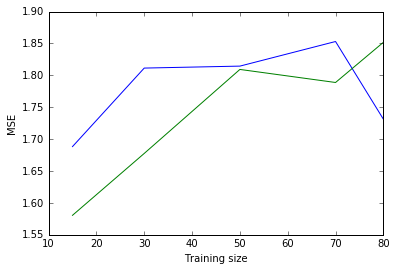

In [297]:
plt.plot(l_set,performance_test_rf, 'b', label='train (Test)')
plt.plot(l_set,performance_train_rf, 'g', label='train (Train)')

#plt.legend();
plt.xlabel('Training size');
plt.ylabel('MSE');

In [298]:
performance_train1_rf = [model_rf2_test_err, model_rf5_train_err, model_rf8_train_err, model_rf11_train_err,model_rf14_train_err]

performance_test1_rf = [  model_rf2_test_err, model_rf5_test_err, model_rf8_test_err, model_rf11_test_err, model_rf14_test_err]

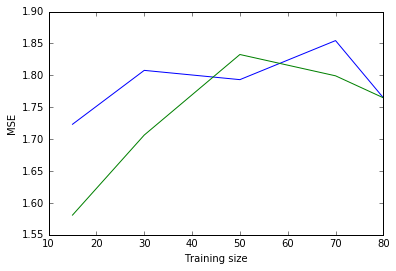

In [299]:
plt.plot(l_set,performance_test1_rf, 'b', label='train (Test)')
plt.plot(l_set,performance_train1_rf, 'g', label='train (Train)')

#plt.legend();
plt.xlabel('Training size');
plt.ylabel('MSE');

In [300]:
from sklearn.cross_validation import train_test_split
from sklearn.learning_curve import learning_curve
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

- Enter your num_voted_users1:3229
- Enter your movie_facebook_likes1: 83
- Enter your duration1: 95
- Enter your num_critic_for_reviews1: 23
- Enter your num_user_for_reviews1: 20
- Enter your director_facebook_likes1: 2
- ('Your Movie Prediction is (Linear Regression: ', array([[ 5.91707527]]))

# LINEAR REGRESSION PREDICTION WITH FEATURE SET 3

LR_set is the Validation Set

In [301]:
LR_set= X_validation3[['num_voted_users','movie_facebook_likes','duration','num_critic_for_reviews','num_user_for_reviews','director_facebook_likes']]

In [303]:
P = y_validation3.as_matrix()
for i in range(0,301):
    XYZ = np.array(LR_set.iloc[i])
    lr_dp = model12.predict(XYZ)
    print("Linear Regression Prediction: ",lr_dp, "Actual: ", P[i:(i+1)])

('Linear Regression Prediction: ', array([[ 6.24600627]]), 'Actual: ', array([[ 6.8]]))
('Linear Regression Prediction: ', array([[ 5.86108578]]), 'Actual: ', array([[ 6.8]]))
('Linear Regression Prediction: ', array([[ 5.98590103]]), 'Actual: ', array([[ 5.9]]))
('Linear Regression Prediction: ', array([[ 7.08150788]]), 'Actual: ', array([[ 6.9]]))
('Linear Regression Prediction: ', array([[ 5.91707527]]), 'Actual: ', array([[ 4.1]]))
('Linear Regression Prediction: ', array([[ 5.93486763]]), 'Actual: ', array([[ 5.4]]))
('Linear Regression Prediction: ', array([[ 5.69385534]]), 'Actual: ', array([[ 4.3]]))
('Linear Regression Prediction: ', array([[ 6.22436088]]), 'Actual: ', array([[ 5.8]]))
('Linear Regression Prediction: ', array([[ 6.16805294]]), 'Actual: ', array([[ 5.7]]))
('Linear Regression Prediction: ', array([[ 6.31612755]]), 'Actual: ', array([[ 6.]]))
('Linear Regression Prediction: ', array([[ 6.33911489]]), 'Actual: ', array([[ 6.3]]))
('Linear Regression Prediction: '

In [304]:
model12_validation_err = ((model12.predict(X_validation3[['num_voted_users','movie_facebook_likes','duration','num_critic_for_reviews','num_user_for_reviews','director_facebook_likes']]) - y_validation3)**2).mean()[0]


In [305]:
model12_validation_err

0.73369221353204195

# RFR PREDICTION WITH FEATURE SET 3

- RF_set is the Validation Dataset for model with FS3
- RF2_set is the Validation Dataset for model with FS2

In [306]:
RF_set= X_validation2[['num_voted_users','movie_facebook_likes','duration','num_critic_for_reviews','num_user_for_reviews','director_facebook_likes']]

In [307]:
RF2_set= X_validation2[['num_voted_users','duration']]

In [308]:
len(X_validation2)

338

In [309]:
P = y_validation2.as_matrix()
for i in range(0,338):
    XYZ = np.array(RF_set.iloc[i])
    rf_dp = model_rf9.predict(XYZ)
    print(" RFR Prediction: ",rf_dp, "Actual: ", P[i:(i+1)])

(' RFR Prediction: ', array([ 6.45]), 'Actual: ', array([[ 6.6]]))
(' RFR Prediction: ', array([ 6.11]), 'Actual: ', array([[ 5.5]]))
(' RFR Prediction: ', array([ 5.75]), 'Actual: ', array([[ 4.6]]))
(' RFR Prediction: ', array([ 6.27]), 'Actual: ', array([[ 5.1]]))
(' RFR Prediction: ', array([ 6.06]), 'Actual: ', array([[ 5.4]]))
(' RFR Prediction: ', array([ 7.35]), 'Actual: ', array([[ 7.6]]))
(' RFR Prediction: ', array([ 6.42]), 'Actual: ', array([[ 6.7]]))
(' RFR Prediction: ', array([ 6.6]), 'Actual: ', array([[ 6.5]]))
(' RFR Prediction: ', array([ 6.71]), 'Actual: ', array([[ 5.3]]))
(' RFR Prediction: ', array([ 7.88]), 'Actual: ', array([[ 7.9]]))
(' RFR Prediction: ', array([ 5.26]), 'Actual: ', array([[ 3.4]]))
(' RFR Prediction: ', array([ 6.72]), 'Actual: ', array([[ 6.4]]))
(' RFR Prediction: ', array([ 6.06]), 'Actual: ', array([[ 4.9]]))
(' RFR Prediction: ', array([ 6.49]), 'Actual: ', array([[ 5.4]]))
(' RFR Prediction: ', array([ 6.44]), 'Actual: ', array([[ 5.1]

In [310]:
#model_rf6_validation_err = ((model_rf6.predict(X_validation1[['num_voted_users','movie_facebook_likes','duration','num_critic_for_reviews','num_user_for_reviews','director_facebook_likes']]) - y_validation1)**2).mean()[0]

temp_rf_val = model_rf9.predict(X_validation2[['num_voted_users','movie_facebook_likes','duration','num_critic_for_reviews','num_user_for_reviews','director_facebook_likes']])
MatVal = y_validation2.as_matrix()
model_rf9_validation_err = ((temp_rf_val - MatVal)**2).mean()

In [311]:
model_rf9_validation_err

1.4650240800392147

In [312]:
P = y_validation2.as_matrix()
for i in range(0,338):
    XYZ = np.array(RF2_set.iloc[i])
    rf_dp = model_rf8.predict(XYZ)
    print(" RFR Prediction: ",rf_dp, "Actual: ", P[i:(i+1)])

(' RFR Prediction: ', array([ 7.56]), 'Actual: ', array([[ 6.6]]))
(' RFR Prediction: ', array([ 5.83]), 'Actual: ', array([[ 5.5]]))
(' RFR Prediction: ', array([ 6.08]), 'Actual: ', array([[ 4.6]]))
(' RFR Prediction: ', array([ 6.06]), 'Actual: ', array([[ 5.1]]))
(' RFR Prediction: ', array([ 5.76]), 'Actual: ', array([[ 5.4]]))
(' RFR Prediction: ', array([ 7.39]), 'Actual: ', array([[ 7.6]]))
(' RFR Prediction: ', array([ 5.87]), 'Actual: ', array([[ 6.7]]))
(' RFR Prediction: ', array([ 6.92]), 'Actual: ', array([[ 6.5]]))
(' RFR Prediction: ', array([ 5.8]), 'Actual: ', array([[ 5.3]]))
(' RFR Prediction: ', array([ 7.61]), 'Actual: ', array([[ 7.9]]))
(' RFR Prediction: ', array([ 4.71]), 'Actual: ', array([[ 3.4]]))
(' RFR Prediction: ', array([ 7.18]), 'Actual: ', array([[ 6.4]]))
(' RFR Prediction: ', array([ 5.61]), 'Actual: ', array([[ 4.9]]))
(' RFR Prediction: ', array([ 5.9]), 'Actual: ', array([[ 5.4]]))
(' RFR Prediction: ', array([ 6.53]), 'Actual: ', array([[ 5.1]]

In [313]:
#model_rf6_validation_err = ((model_rf6.predict(X_validation1[['num_voted_users','movie_facebook_likes','duration','num_critic_for_reviews','num_user_for_reviews','director_facebook_likes']]) - y_validation1)**2).mean()[0]

temp_rf_val = model_rf8.predict(X_validation2[['num_voted_users','duration']])
MatVal = y_validation2.as_matrix()
model_rf8_validation_err = ((temp_rf_val - MatVal)**2).mean()

In [314]:
model_rf8_validation_err

1.6063047564861177

In [316]:
num_voted_users1 = float(input("Enter your num_voted_users1 "))
movie_facebook_likes1 = float(input("Enter your movie_facebook_likes1 "))
duration1 = float(input("Enter your duration1 "))
num_critic_for_reviews1 = float(input("Enter your num_critic_for_reviews1 "))
num_user_for_reviews1 = float(input("Enter your num_user_for_reviews1 "))
director_facebook_likes1 = float(input("Enter your director_facebook_likes1 "))
XYZ1 = [num_voted_users1, movie_facebook_likes1, duration1, num_critic_for_reviews1, num_user_for_reviews1, director_facebook_likes1]
XYZ1 = np.array([XYZ1])
#XYZ = XYZ.reshape(len(XYZ),1)
rf_dp = model_rf3.predict(XYZ1)
print("Your Movie Prediction is (RF: ",rf_dp)

Enter your num_voted_users1 12412
Enter your movie_facebook_likes1 124124
Enter your duration1 123123
Enter your num_critic_for_reviews1 123123
Enter your num_user_for_reviews1 123123123
Enter your director_facebook_likes1 123123
('Your Movie Prediction is (RF: ', array([ 4.58]))


In [320]:
num_voted_users1 = float(input("Enter your num_voted_users1:"))
movie_facebook_likes1 = float(input("Enter your movie_facebook_likes1: "))
duration1 = float(input("Enter your duration1: "))
num_critic_for_reviews1 = float(input("Enter your num_critic_for_reviews1: "))
num_user_for_reviews1 = float(input("Enter your num_user_for_reviews1: "))
director_facebook_likes1 = float(input("Enter your director_facebook_likes1: "))
XYZ = [num_voted_users1, movie_facebook_likes1, duration1, num_critic_for_reviews1, num_user_for_reviews1, director_facebook_likes1]
XYZ = np.array([XYZ])
#XYZ = XYZ.reshape(len(XYZ),1)
lr_dp = model12.predict(XYZ)
print("Your Movie Prediction is (Linear Regression: ",lr_dp)

Enter your num_voted_users1:12345
Enter your movie_facebook_likes1: 0
Enter your duration1: 121
Enter your num_critic_for_reviews1: 1234
Enter your num_user_for_reviews1: 2345
Enter your director_facebook_likes1: 1811
('Your Movie Prediction is (Linear Regression: ', array([[ 6.55795225]]))
